In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import streamlit as st
import joblib 

In [14]:
df =  pd.read_csv('datasets\Salary_Data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_26064\4141437463.py:1: SyntaxWarning: invalid escape sequence '\S'
  df =  pd.read_csv('datasets\Salary_Data.csv')


In [15]:
print(df)
print(df.describe())
print(df.head())
print(df.info())
print(df.duplicated().sum())
print(df.isnull().sum)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
       YearsExperience         Salary
count        30.000000      30.0

<Figure size 1000x500 with 0 Axes>

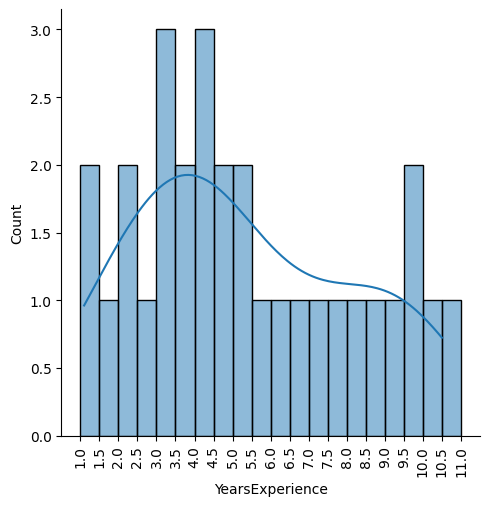

In [16]:
# df['YearsExperience'].plot()
plt.figure(figsize=(10,5))
interval = np.arange(1,11.1,0.5)
sns.displot(df['YearsExperience'],kde=True,bins = interval)
plt.xticks(interval,rotation = 90)
plt.show()

In [17]:
X = df[['YearsExperience']].values
y = df['Salary'].values

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X,y)
y_pred = model.predict(X)

a = model.predict([[3.4]])
print(a)


[57922.07209162]


In [20]:
joblib.dump(model,'lr_model')

['lr_model']

In [21]:
# %%writefile app.py

# st.header("This a Salary Prediction Model Based on Years of Experience")
# st.caption("This ML model was desighned with a sample data obtained from kaggle. Linear Regression was the algorith used to make the model")
# model = joblib.load('lr_model')
# years = st.slider("Enter the number of years of Experience", min_value=0.0,max_value=20.0,value=5.0,step=0.1)

# if st.button("PREDICT"):
#     op = model.predict([[years]])
#     st.header("The estimted salary for a person having "+str(years)+" years of experience is ₹"+ st(round(op[0],2)))



In [22]:
%%writefile app.py

import streamlit as st
import joblib

# Title and description
st.header("This is a Salary Prediction Model Based on Years of Experience")
st.caption("This ML model was designed with a sample dataset obtained from Kaggle. Linear Regression was the algorithm used to make the model.")

# Load saved model
model = joblib.load('lr_model')  # Make sure you saved it earlier using joblib.dump(model, 'lr_model.pkl')

# User input
years = st.slider("Enter the number of years of experience", min_value=0.0, max_value=20.0, value=5.0, step=0.1)

# Prediction
if st.button("PREDICT"):
    op = model.predict([[years]])  # Predict using model
    st.header(f"The estimated salary for a person with {years} years of experience is ₹ {round(op[0], 2)}")


Overwriting app.py
